#### [**<- BACK**](https://github.com/ryayoung/transshipment-optimization)

# **Ski Boot Manufacturing**
## *Multi-stage Transshipment* - **SOLUTION 2**

> Original problem created by [Ryan Elmore](https://github.com/rtelmore), and modified by [Ryan Young](https://github.com/ryayoung) in winter of 2022.

**Problem:**

- We're given cost and production data for a ski boot manufacturer. There are three manufacturing plants, two distribution centers, and five warehouses.
- We must ship the boots to the warehouses at a minimum cost satisfying the given constraints. Each plant can only produce so much product, the amount of boots passing through the distribution centers has to remain constant (inflow equals outflow), and each warehouse has a minimum quantity needed to satisfy demand.

<img width="350" alt="diagram" src="diagram.png">

**Research Questions:**

1. Determine how many units of product should be sent through *each* location in each stage of the transshipment flow (P -> D, and D -> W) to *minimize cost*, while satisfying all constraints for supply, capacity, and warehouse demand. Then find the total cost of the process.
2. Check for slack in the system.
3. Visualize the decision variables with bar charts. Plot stage 1 (P -> D) and stage 2 (D -> W) in separate charts.
4. Visualize how overall total cost changes as a function of cost at a single *edge* in the network. Test the P3 -> D1 edge on a sequence of costs from 0.5 to 0.7 in one cent increments, re-running the model for each.
    1. Plot overall shipping costs as a function of the change of this value.
    2. Make two additional plots: (1.) Units shipped between P3 and the two distribution centers, and (2.) Units shipped between each distribution center and the 5 warehouses.
5. Visualize how overall total cost changes as a function of demand (minimum units required) at a warehouse node. Test the W3 demand constraint on a sequence from 4700 to 7300 units, incrementing by 100, and re-run the model for each. Plot the change of total cost over the increase in W3 demand.

**Solution 2:** *What's different?*
- Here I'll be using `tsopt`, a Python library I created to solve this exact type of problem. It takes cost, capacity, and demand constraint data from csv or excel files and gives you easy tools to explore solutions. View the [documentation here](https://github.com/ryayoung/tsopt), or the [PyPI page here](https://pypi.org/project/tsopt/)
---

In [23]:
import tsopt as ts
import pandas as pd
import pyomo.environ as pe
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
layer_names = ['plant', 'distributor', 'warehouse']

def new_model():
    return ts.Model(excel_file='data.xlsx', layers=layer_names,
        tbl_c1='cost1', tbl_c2='cost2', tbl_capacity='capacity', tbl_demand='demand')

In [25]:
md = new_model()
md.display()

Plant to Distributor costs


,D1,D2
P1,0.50,0.60
P2,0.65,0.65
P3,0.63,0.78


Distributor to Warehouse costs


,W1,W2,W3,W4,W5
D1,0.5,0.4,0.3,0.5,0.72
D2,0.7,0.6,0.2,0.5,0.55


Output capacity from Plant


,Capacity
P1,10000
P2,11000
P3,10500


Demand required from Warehouse


,Requirement
W1,5000
W2,7500
W3,6000
W4,5500
W5,6250


### **1:** Optimal Solution

> Determine how many units of product should be sent through *each* location in each stage of the transshipment flow (P -> D, and D -> W) to *minimize cost*, while satisfying all constraints for supply, capacity, and warehouse demand. Then find the total cost of the process.

In [26]:
md.run()
md.print_result()

OBJECTIVE VALUE
Minimized Cost: $30990.0

DECISION VARIABLE QUANTITIES
Plant to Distributor:


,D1,D2
P1,10000,0
P2,0,11000
P3,9250,0


Distributor to Warehouse:


,W1,W2,W3,W4,W5
D1,5000,7500,1250,5500,0
D2,0,0,4750,0,6250


### **2:** Check for slack

In [27]:
md.print_slack()

The following 1 constraints have slack:
P3: 1250.0


### **3:** Visualize decision vars

> Visualize the decision variables with bar charts. Plot stage 1 (P -> D) and stage 2 (D -> W) in separate charts.

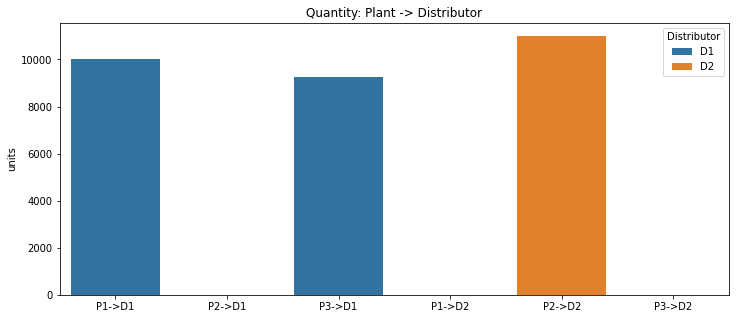

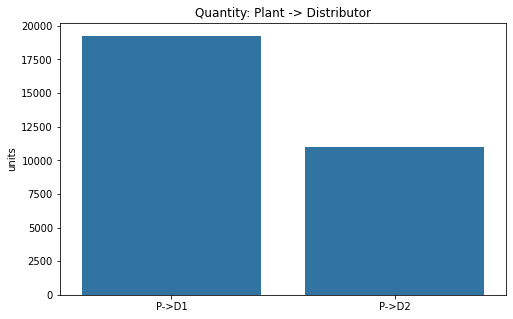

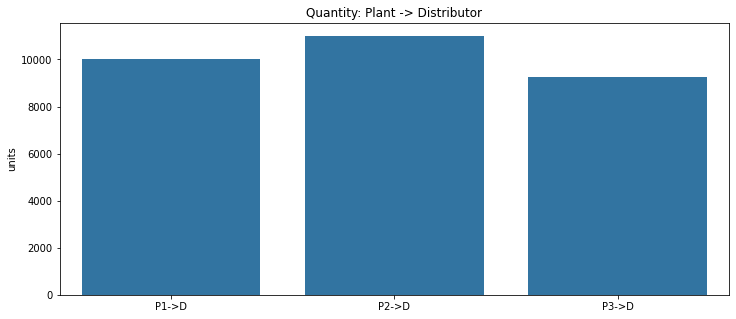

In [28]:
# Stage 1
md.plot_stage_quantity(1)
md.plot_stage_quantity(1, sum_inflow=True, sum_outflow=False)
md.plot_stage_quantity(1, sum_inflow=False, sum_outflow=True);

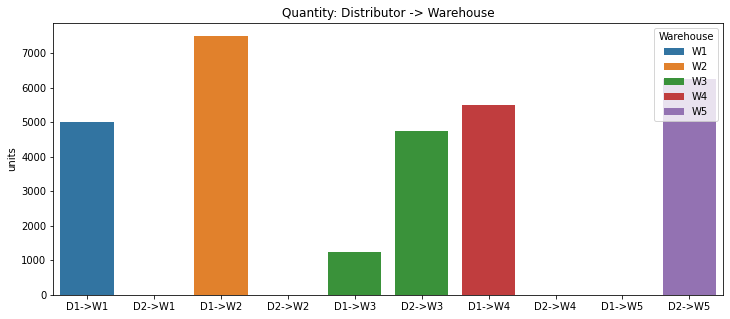

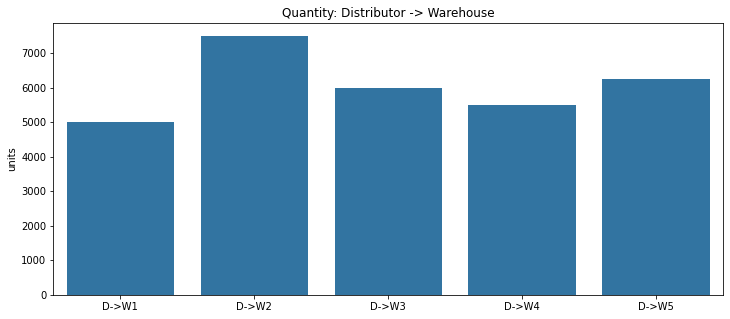

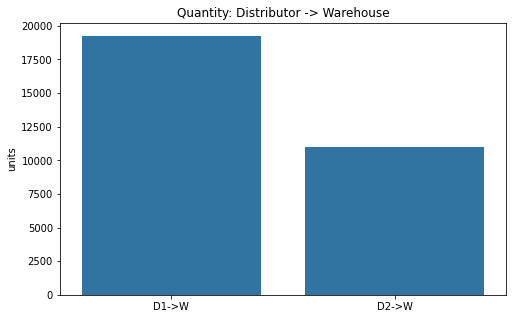

In [29]:
# Stage 2
md.plot_stage_quantity(2)
md.plot_stage_quantity(2, sum_inflow=True, sum_outflow=False)
md.plot_stage_quantity(2, sum_inflow=False, sum_outflow=True);

### **4:** Total cost as fx of edge cost

> Visualize how overall total cost changes as a function of cost at a single *edge* in the network. Test the P3 -> D1 edge on a sequence of costs from 0.5 to 0.7 in one cent increments, re-running the model for each.